# Assignement 5
## Exercise 1.

Plaque model
$$\begin{cases} \frac{\operatorname{d}S(t)}{\operatorname{d}t} = b S - \beta I S\\ \frac{\operatorname{d}I(t)}{\operatorname{d}t} = \beta I S-kI\end{cases}$$
where S(t) - number of susceptible indyviduals, I(t) - number of infected indyviduals.

Solve the equation for:
b = 3, $\beta$ = 3, k = 3.

Initial conditions:
S(0) = 1, 
I(0) = [0.1, 0.5, 1.3]

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider

In [29]:
b=3
beta=3
k=3
S0=1
I0=[0.1, 0.5, 1.3]

In [30]:
def model_plaque(y,t):
    S,I = y
    dydt = [b*S - beta*I*S, beta*I*S - k*I]
    return dydt

In [31]:
def solve(model, S0, I0, t):
    model0 = [S0, I0] #applying initial conditions
    Sol = odeint(model, model0, t)
    return Sol

### Phase plots

In [191]:
def draw_phase_portraite(model, S0, I0, T, N):

    tspan = np.linspace(0, T, N)
    for i0 in [0.1, 0.5, 1, 1.3, 1.5]:
        Solution = solve(model_plaque, S0, i0, tspan)
        plt.plot(Solution[:,0], Solution[:,1],'b-') # path
        plt.plot([Solution[0,0]], [Solution[0,1]], 'o', label=i0) # start

    quiver = 0.25
    S, I = np.meshgrid(np.arange(-0.2-quiver, 4+2*quiver, quiver),
                       np.arange(-0.2-quiver, 4+2*quiver, quiver))
    [U, V] = model_plaque([S, I], tspan)
    Q = plt.quiver(S, I, U, V, units='x', scale=20, width=0.01)
    plt.plot([S0, S0], [4+quiver, -0.2-quiver], 'm')
    #plt.savefig('images/phase-portrait.png')
    plt.legend(loc='best')
    plt.xlabel('S(t)')
    plt.ylabel('I(t)')
    plt.grid()
    plt.show()


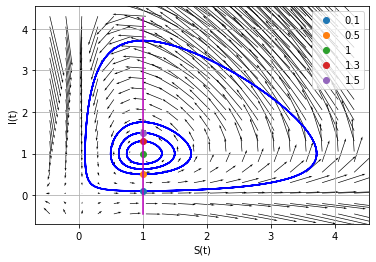

In [192]:
draw_phase_portraite(model_plaque, S0, I0, 10, 1000)

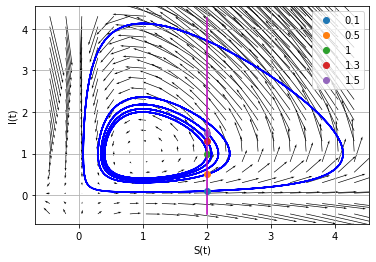

In [193]:
draw_phase_portraite(model_plaque, 2, I0, 10, 1000)

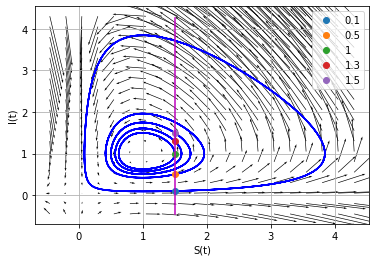

In [194]:
draw_phase_portraite(model_plaque, 1.5, I0, 10, 1000)

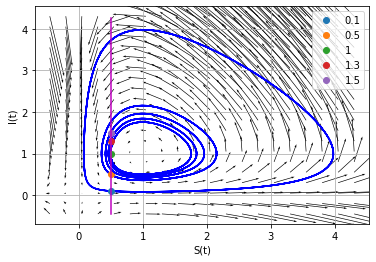

In [195]:
draw_phase_portraite(model_plaque, 0.5, I0, 10, 1000)

### Function plots

In [190]:
def draw_fun(model, S0, In, T, N):
    tspan = np.linspace(0, T, N)
    Solution = solve(model, S0, In, tspan)
    plt.plot(tspan, Solution[:,0], label = 'S')
    plt.plot(tspan, Solution[:,1], label = 'I')
    plt.xlabel('S(t)')
    plt.ylabel('t')
    plt.legend(loc='best')
    plt.title('I0='+str(In))
    plt.show()

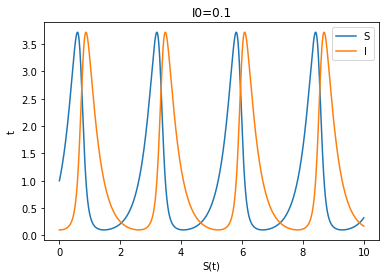

In [105]:
draw_fun(model_plaque, S0, 0.1, 10, 10000)

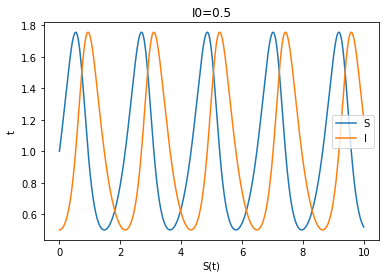

In [108]:
draw_fun(model_plaque, S0, 0.5, 10, 10000)

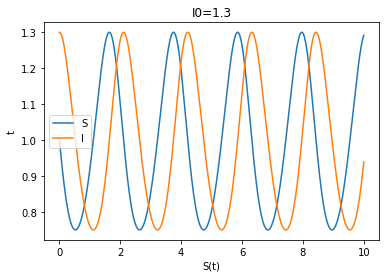

In [109]:
draw_fun(model_plaque, S0, 1.3, 10, 10000)

## Exercise 2.

SIR model
$$\begin{cases} \frac{\operatorname{d}S(t)}{\operatorname{d}t} = - \beta S I\\ \frac{\operatorname{d}I(t)}{\operatorname{d}t} = \beta S I - rI\\ \frac{\operatorname{d}R(t)}{\operatorname{d}t} = rI\end{cases}$$
where S(t) - number of susceptible indyviduals, I(t) - number of infected indyviduals, R(t) - removed indyviduals.

SIR model - reduced to a two-dimensional system
$$\begin{cases} \frac{\operatorname{d}S(t)}{\operatorname{d}t} = - \beta S I\\ \frac{\operatorname{d}I(t)}{\operatorname{d}t} = \beta S I - rI\end{cases}$$
where S(t) - number of susceptible indyviduals, I(t) - number of infected indyviduals.

In [342]:
def model_SIR(y, t, beta, r):
    S, I, R = y
    dydt = [-beta*I*S, beta*I*S-r*I, r*I]
    return dydt

In [343]:
def solve_SIR(model, S0, I0, R0, t, beta, r):
    model0 = [S0, I0, R0] #initial conditions
    Sol = odeint(lambda y, t: model_SIR(y, t, beta, r), model0, t)
    return Sol

### Function Plots

In [344]:
def draw_SIR(model, S0, I0, R0, beta, r, T, N):
    tspan = np.linspace(0, T, N)
    solution = solve_SIR(model, S0, I0, R0, tspan, beta, r)
    S = solution[:,0]
    I = solution[:,1]
    R = solution[:,2]
    plt.plot(tspan, S, label=' S(t)')
    plt.plot(tspan, I, label='I(t)')
    plt.plot(tspan, R, label='R(t)')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.ylabel('SIR')
    plt.title('beta='+str(beta))

In the belowed figures i have used beta values stated on the lecture to compare the results.

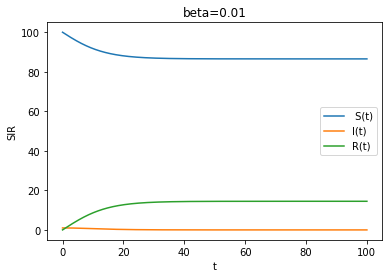

In [21]:
draw_SIR(model_SIR, 100, 1, 0, 0.01, 1, 100, 1000)

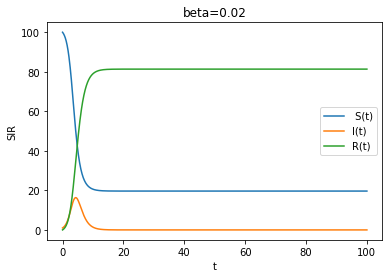

In [19]:
draw_SIR(model_SIR, 100, 1, 0, 0.02, 1, 100, 1000)

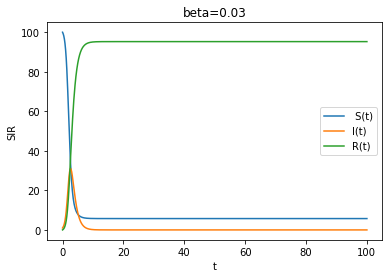

In [20]:
draw_SIR(model_SIR, 100, 1, 0, 0.03, 1, 100, 1000)

Lets choose some bigger beta values

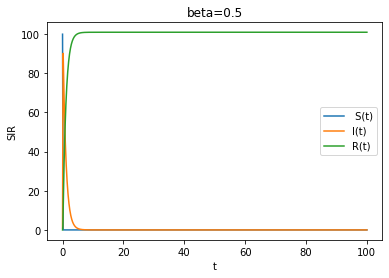

In [33]:
draw_SIR(model_SIR, 100, 1, 0, 0.5, 1, 100, 1000)

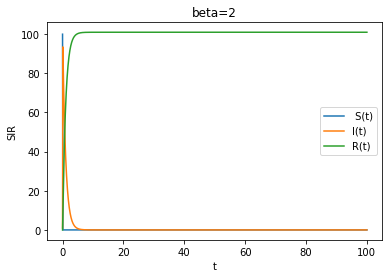

In [34]:
draw_SIR(model_SIR, 100, 1, 0, 2, 1, 100, 1000)

In [348]:
#Slide Show - various beta, r and N values
@interact(N=(1, 100), 
          beta=(0.0, 2.0, 0.01), 
          r=FloatSlider(value=15, min=0.001, max=50, step=0.001))
def check(N, beta, r):
    print("R0 =", beta*N/r)
    draw_SIR(model_SIR,100, 1, 0, beta, r, 10, N)
    plt.show()

interactive(children=(IntSlider(value=50, description='N', min=1), FloatSlider(value=1.0, description='beta', …

### Phase plots

In [284]:
def draw_phase_portraite_SIR(model, S0, I0, R0, r, beta, T, N):

    tspan = np.linspace(0, T, N)
    for i0 in I0:
        Solution = solve_SIR(model, S0, i0, R0, tspan, beta, r)
        plt.plot(Solution[:,0], Solution[:,1],'b-') # path
        plt.plot([Solution[0,0]], [Solution[0,1]], 'o', label=r"$%g\quad(R_0=%g)$"%(i0,beta*(S0+R0+i0)/r)) # start

    quiver = 1.2
    S, I = np.meshgrid(np.arange(0-quiver, 12+2*quiver, quiver),
                       np.arange(-0.1-quiver, 6+2*quiver, quiver))
    [U, V, W] = model_SIR([S, I, R0], tspan, beta, r)
    Q = plt.quiver(S, I, U, V, units='x', scale=2, width=0.01)
    plt.plot([S0, S0], [6+quiver, -1-quiver], 'm')
    #plt.savefig('images/phase-portrait.png')
    plt.legend(loc='best')
    plt.xlabel('S(t)')
    plt.ylabel('I(t)')
    plt.grid()
    plt.show()


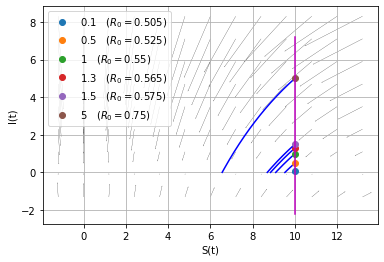

In [285]:
draw_phase_portraite_SIR(model_SIR, S0, [0.1, 0.5, 1, 1.3, 1.5, 5], 0,1,0.05, T, N)

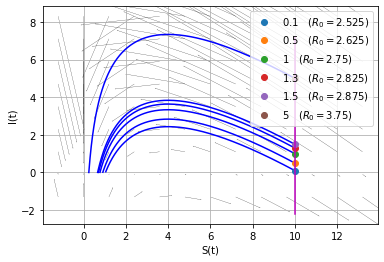

In [286]:
draw_phase_portraite_SIR(model_SIR, S0, [0.1, 0.5, 1, 1.3, 1.5, 5], 0,1,0.25, T, N)

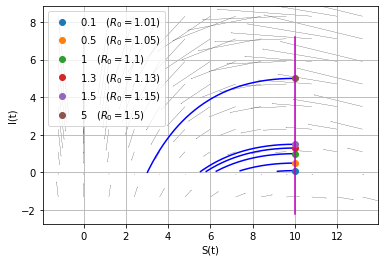

In [287]:
draw_phase_portraite_SIR(model_SIR, S0, [0.1, 0.5, 1, 1.3, 1.5, 5], 0,1,0.1, T, N)

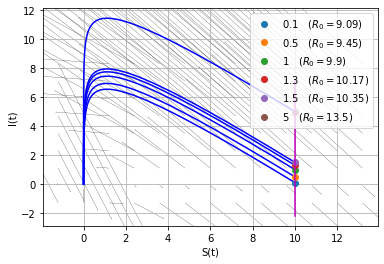

In [288]:
draw_phase_portraite_SIR(model_SIR, S0, [0.1, 0.5, 1, 1.3, 1.5, 5], 0,1,0.9, T, N)

### Total number of indyviduals infected during the epidemic. Number of infections as a function of R0.

In [147]:
@np.vectorize
def solSIR(S0, I0, R0, T, N, beta, r):
    tspan = np.linspace(0, T, N)
    modelsol = solve_SIR(model_SIR, S0, I0, R0, tspan, beta, r)
    S_T = modelsol[-1,0]
    return S0-S_T

Text(0.5, 1.0, 'Number of infections as a function of R0')

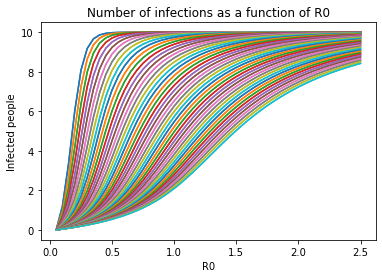

In [156]:
r = np.arange(0.05,2.55,0.05)
beta = np.arange(0, 0.5, 0.01)
R, BETA = np.meshgrid(r, beta)
#initial conditions
S0 = 10 
I0 = 1
R0 = 0

T = 10
N = 1000

I = solSIR(S0, I0, R0, T, N, BETA, R)
plt.plot(r,I)
plt.xlabel('R0')
plt.ylabel('Infected people')
plt.title('Number of infections as a function of R0')

## Exercise 3.

In [175]:
import random as rn
import networkx as nx
import imageio

### a) Simulation

In [337]:
def SIR_Simulation(Graph, N, nodes, beta, p): #nodes - number of nodes in the Graph, p is a probability of the recovery, beta - probability of the infection, N - nuber of simulation
    rn.seed() 
    G = Graph
    images = []
    
    for n in G.nodes(): #initializing all nodes in the graph as helathy at the begining
        G.nodes[n]['State'] = 'S'
        
    infected0 = rn.choice(list(G.nodes())) #randomly chosiing first infected node
    G.nodes[infected0]['State'] = 'I'
    pos=nx.circular_layout(G) #calculates position of the nodes
    #pos = dict(((i,j), (i*20,j*20)) for i,j in G.nodes())
    
    for step in range(N):
        counter = 0
        while counter < nodes:
            counter = counter + 1
            n = rn.choice(list(G.nodes()))
            if G.nodes[n]['State'] == 'I': #checking if the chosen node is infected
                if rn.random() < p: #checking if random number is smaller than probability of the recovery
                    G.nodes[n]['State'] = 'R'
                else: #if random number is bigger than p we want to infect a neighbour with probability beta
                    infect_neigh = rn.choice(list(G.neighbors(n)))
                    if G.nodes[infect_neigh]['State'] == 'S' and rn.random() < beta:
                        G.nodes[infect_neigh]['State'] = 'I'
            sl = []
            il = []
            rl = []
            for node, data in G.nodes(data=True):
                if data['State'] == 'S':
                    sl.append(node)
                elif data['State'] == 'I':
                    il.append(node)
                else:
                    rl.append(node)
            nx.draw_networkx_edges(G,pos)
            nx.draw_networkx_nodes(G,pos,nodelist=sl,node_color='#eeefff')
            nx.draw_networkx_nodes(G,pos,nodelist=il,node_color='r')
            nx.draw_networkx_nodes(G,pos,nodelist=rl,node_color='k')
            plt.axis("off")
            filename = "images_list_5/f/WattStrogatz/SIRnetwork" + str(step) + "_" + str(counter) + ".png"
            plt.savefig(filename)
            plt.close()
            images.append(imageio.imread(filename))
            
    imageio.mimwrite("images_list_5/f/WattStrogatz/animation.avi", images[:], fps=8)

In [201]:
N = 10
nodes = 20
beta = 0.9
p = 0.2
Graph = nx.barabasi_albert_graph(N,4)
SIR_Simulation(Graph, N, nodes, beta, p)

In [229]:
N = 20
nodes = 8
beta = 1
p = 0.2
Graph = nx.generators.grid_2d_graph(nodes,nodes)
SIR_Simulation(Graph, N, nodes, beta, p)

In [223]:
N = 10
nodes = 20
beta = 1
p = 0.2
Graph = nx.random_graphs.erdos_renyi_graph(nodes,0.5)
SIR_Simulation(Graph, N, nodes, beta, p)

In [237]:
N = 10
nodes = 20
beta = 1
p = 0.2
Graph = nx.random_graphs.watts_strogatz_graph(nodes,4, 0.2)
SIR_Simulation(Graph, N, nodes, beta, p)

In [241]:
N = 10
nodes = 20
beta = 1
p = 0.2
Graph = nx.random_graphs.erdos_renyi_graph(nodes,0.5)
SIR_Simulation(Graph, N, nodes, beta, p)

### f)

In [327]:
N = 30
nodes = 5
beta = 0.95
p = 0.2
Graph = nx.generators.grid_2d_graph(nodes,nodes)
SIR_Simulation(Graph, N, nodes, beta, p)

In [334]:
N = 10
nodes = 30
beta = 0.95
p = 0.2
Graph = nx.barabasi_albert_graph(nodes,3)
SIR_Simulation(Graph, N, nodes, beta, p)

In [336]:
N = 10
nodes = 30
beta = 1
p = 0.2
Graph = nx.random_graphs.erdos_renyi_graph(nodes,0.5)
SIR_Simulation(Graph, N, nodes, beta, p)

In [338]:
N = 10
nodes = 30
beta = 1
p = 0.2
Graph = nx.random_graphs.watts_strogatz_graph(nodes,4, 0.2)
SIR_Simulation(Graph, N, nodes, beta, p)

### b) Fraction infected

In [298]:
def fraction_of_infected(Graph, N, nodes, beta, p):
    G = Graph
    
    for n in G.nodes(): #initializing all nodes in the graph as helathy at the begining
        G.nodes[n]['State'] = 'S'
        
    infected0 = rn.choice(list(G.nodes())) #randomly chosiing first infected node
    G.nodes[infected0]['State'] = 'I'
    
    for step in range(N):
        counter = 0
        while counter < nodes:
            counter = counter + 1
            n = rn.choice(list(G.nodes()))
            if G.nodes[n]['State'] == 'I': #checking if the chosen node is infected
                if rn.random() < p: #checking if random number is smaller than probability of the recovery
                    G.nodes[n]['State'] = 'R'
                else: #if random number is bigger than p we want to infect a neighbour with probability beta
                    infect_neigh = rn.choice(list(G.neighbors(n)))
                    if G.nodes[infect_neigh]['State'] == 'S' and rn.random() < beta:
                        G.nodes[infect_neigh]['State'] = 'I'
        sl = []
        il = []
        rl = []
        frac_infected = []
        for node, data in G.nodes(data=True):
            if data['State'] == 'S':
                sl.append(node)
            elif data['State'] == 'I':
                il.append(node)
                infected = len(il)
                frac = infected/nodes
                frac_infected.append(frac)
            else:
                rl.append(node)
                    
        return frac_infected
    
            

In [293]:
N = 10
nodes = 20
beta = 0.9
p = 0.2
Graph = nx.barabasi_albert_graph(N,4)
fraction_of_infected(Graph, N, nodes, beta, p)

[0.05]

In [310]:
N = 1000
nodes = 10
beta = 1
p = 0.1
Graph = nx.random_graphs.erdos_renyi_graph(nodes,0.5)
fraction_of_infected(Graph, N, nodes, beta, p)

[0.1, 0.2, 0.3, 0.4, 0.5]

In [317]:
N = 100
nodes = 10
beta = 1
p = 0.2
Graph = nx.random_graphs.erdos_renyi_graph(nodes,0.5)
fraction_of_infected(Graph, N, nodes, beta, p)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [325]:
N = 100
nodes = 10
beta = 1
p = 0.4
Graph = nx.random_graphs.erdos_renyi_graph(nodes,0.5)
fraction_of_infected(Graph, N, nodes, beta, p)

[0.1, 0.2]

In [324]:
N = 100
nodes = 10
beta = 1
p = 0.8
Graph = nx.random_graphs.erdos_renyi_graph(nodes,0.5)
fraction_of_infected(Graph, N, nodes, beta, p)

[]

### c) 
I have discussed those results with friends, didn't manage to figure them out alone.
Lattice graph: $p_0 \approx 0.3$ outbreak when $p>p_0$, and $R_0>1$ in ODE model.

Barabasi-Alberta graph: $p_0$ $\approx 0.1$.

Random graph: $p_0$ $\approx 0.05$.

Wattsa-Strogatz graph: $p_0$ $\approx 0.25$.